In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
adi_data = pd.read_csv(r'C:\Users\Admin\Downloads\ADI_Data_with_Additional_Independent_Variables.csv')

In [4]:
def preprocess_data(df):
    df['Datetime'] = pd.to_datetime(df['Datetime']) 
    df.set_index('Datetime', inplace=True)           
    df = df.asfreq('D')                              
    df = df.fillna(method='ffill')                 
    return df

adi_data = preprocess_data(adi_data)
adi_close = adi_data[['LogAdjClose']].dropna()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25608\1289400293.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
def forecast_with_prophet(df):
    df_prophet = df.reset_index().rename(columns={'Datetime': 'ds', 'LogAdjClose': 'y'})
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(df_prophet)
    forecast = model.predict(df_prophet[['ds']])  
    return forecast

09:42:52 - cmdstanpy - INFO - Chain [1] start processing
09:42:54 - cmdstanpy - INFO - Chain [1] done processing


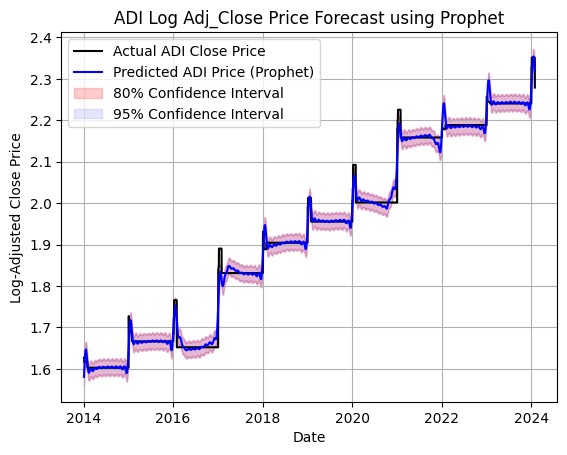

In [8]:
adi_forecast_prophet = forecast_with_prophet(adi_close)
plt.plot(adi_forecast_prophet['ds'], adi_close['LogAdjClose'], label='Actual ADI Close Price', color='black')
plt.plot(adi_forecast_prophet['ds'], adi_forecast_prophet['yhat'], label='Predicted ADI Price (Prophet)', color='blue')
plt.fill_between(adi_forecast_prophet['ds'], 
                 adi_forecast_prophet['yhat_lower'], 
                 adi_forecast_prophet['yhat_upper'], 
                 color='red', alpha=0.2, label='80% Confidence Interval')
plt.fill_between(adi_forecast_prophet['ds'], 
                 adi_forecast_prophet['yhat_lower'], 
                 adi_forecast_prophet['yhat_upper'], 
                 color='blue', alpha=0.1, label='95% Confidence Interval')

plt.title('ADI Log Adj_Close Price Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Log-Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
y_true = adi_close['LogAdjClose']
y_pred_prophet = adi_forecast_prophet.set_index('ds')['yhat']
adi_mse_prophet = mean_squared_error(y_true, y_pred_prophet)
print(f'ADI Prophet MSE: {adi_mse_prophet}')

In [ ]:
def calculate_r_squared(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    r_squared = 1 - mse / variance
    return r_squared

In [ ]:
adi_r_squared_prophet = calculate_r_squared(y_true, y_pred_prophet)
print(f'ADI Prophet R-squared: {adi_r_squared_prophet}')
adi_mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
print(f'ADI Prophet MAE: {adi_mae_prophet}')
adi_mape_prophet = mean_absolute_percentage_error(y_true, y_pred_prophet)
print(f'ADI Prophet MAPE: {adi_mape_prophet}')